Indice: 
  - Introduccion
  - Codigo
  - Conclusion

# INTRODUCCION

Utilizaremos dataset "disp_st31ns1.txt" para entrenar

1.   List item
2.   List item



# CODIGO

Creo que el codigo final va en otro notebook, pero lo hacemos aqui de mientras

In [ ]:
# Instalamos las lib que no esten en jupyter
# Para visualizar arboles
!pip install --upgrade linear-tree

!pip install statsmodels

In [ ]:
# Estructura de datos, en la que cargaremos los datos (seran de diferentes tipos)
import pandas as pd
# Pasaremos los datos de panda a matriz de valores numerico numpy
import numpy as np
# sklearn (arlgoritmos, etc)
#from sklearn.model_selection import train_test_split
#from sklearn import metrics
#from sklearn import tree
#from sklearn.linear_model import LinearRegression

#from lineartree import LinearTreeRegressor

# Lectura de datos del archivo disp_st31ns1.txt.bz2 en un dataFrame(pandas)
#data_frame = pd.read_csv('disp_st31ns1.txt')
#print(data_frame)

# Pasar los datos no numericos 
#----------------------------

# NUMPY
#X = np.array(data_frame)

# SKLEARN
# Divide los datos en un conjunto de entrenamiento y un conjunto de prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crea el modelo y ajustalo a los datos de entrenamiento
#regressor = LinearRegression()
#regressor.fit(X_train, y_train)

# Evalua la precision del modelo utilizando los datos de prueba
#y_pred = regressor.predict(X_test)


Se hacen los imports

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import time # ya que se pide que se mida el tiempo de ejecucion

Se lodean los datos y se divide en entrenamiento y en test

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Cargar los datos
data_frame = pd.read_csv('disp_st32ns1.txt')

# Seleccionar las columnas relevantes para X e Y
X = data_frame.iloc[:, 2:-1]  # Todas las columnas excepto las dos primeras y la última
y = data_frame.iloc[:, -1]    # La última columna que es el objetivo
# Imprimir las primeras filas de X
print('VARIABLES')
print(X.head())

# Imprimir las primeras filas de y objetivo
print('OBJETIVO')
print(y.head())
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


VARIABLES
   apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  dlwrf_s2_1  \
0         0.0         0.0    0.000000    0.000000  278.401764  246.423459   
1         0.0         0.0    0.016364    0.132727  249.362233  255.096853   
2         0.0         0.0    0.000000    0.000000  233.007274  215.177840   
3         0.0         0.0    0.000000    0.000000  240.408503  237.441999   
4         0.0         0.0    0.000000    0.000000  232.071838  237.108869   

   dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  dswrf_s1_1  ...  ulwrf_t1_1  \
0  251.719940  268.195853  266.377441         0.0  ...  208.516803   
1  273.618458  320.441742  310.292719         0.0  ...  236.291236   
2  217.951275  237.074578  238.476496         0.0  ...  226.837472   
3  247.948128  255.274556  245.349503         0.0  ...  239.421233   
4  245.123549  267.031791  267.845553         0.0  ...  232.641681   

   ulwrf_t2_1  ulwrf_t3_1  ulwrf_t4_1  ulwrf_t5_1  uswrf_s1_1  uswrf_s2_1  \
0  251.322657  254.851178  26

## Valores por defecto

Evaluar en KNN

In [ ]:
# Crear el modelo KNN
knn = KNeighborsRegressor()

# Medir tiempo de entrenamiento
start_time = time.time()

# Entrenar el modelo KNN con los datos de entrenamiento
knn.fit(X_train, y_train)

# Calcular tiempo de entrenamiento
train_time_knn = time.time() - start_time

# Predecir los valores de producción de energía solar con el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el modelo con las métricas RMSE y MAE
rmse_knn = mean_squared_error(y_test, y_pred, squared=False)
mae_knn = mean_absolute_error(y_test, y_pred)

print('KNN RMSE:', rmse_knn)
print('KNN MAE:', mae_knn)
print('Tiempo de entrenamiento:', train_time_knn)

KNN RMSE: 4022519.6907967767
KNN MAE: 3000940.660273973
Tiempo de entrenamiento: 0.008753061294555664


Con arboles de regresion

In [ ]:
# Crear el modelo de árboles de regresión
tree = DecisionTreeRegressor()

# Medir tiempo de entrenamiento
start_time = time.time()

# Entrenar el modelo de árboles de regresión con los datos de entrenamiento
tree.fit(X_train, y_train)

# Calcular tiempo de entrenamiento
train_time_tree = time.time() - start_time

# Predecir los valores de producción de energía solar con el conjunto de prueba
y_pred = tree.predict(X_test)

# Evaluar el modelo con las métricas RMSE y MAE
rmse_tree = mean_squared_error(y_test, y_pred, squared=False)
mae_tree = mean_absolute_error(y_test, y_pred)

print('Árboles de regresión RMSE:', rmse_tree)
print('Árboles de regresión MAE:', mae_tree)
print('Tiempo de entrenamiento:', train_time_tree)


Árboles de regresión RMSE: 4932124.201037631
Árboles de regresión MAE: 3332421.0821917807
Tiempo de entrenamiento: 0.43798303604125977


Con regresion lineal

In [ ]:
# Crear el modelo de regresión lineal
lr = LinearRegression()

# Medir tiempo de entrenamiento
start_time = time.time()

# Entrenar el modelo de regresión lineal con los datos de entrenamiento
lr.fit(X_train, y_train)

# Calcular tiempo de entrenamiento
train_time_lr = time.time() - start_time

# Predecir los valores de producción de energía solar con el conjunto de prueba
y_pred = lr.predict(X_test)

# Evaluar el modelo con las métricas RMSE y MAE
rmse_lr = mean_squared_error(y_test, y_pred, squared=False)
mae_lr = mean_absolute_error(y_test, y_pred)

print('Regresión lineal RMSE:', rmse_lr)
print('Regresión lineal MAE:', mae_lr)
print('Tiempo de entrenamiento:', train_time_lr)


Regresión lineal RMSE: 3293382.8090738435
Regresión lineal MAE: 2416381.7337952727
Tiempo de entrenamiento: 0.046337127685546875


### Comparacion entre las tres ejecuciones

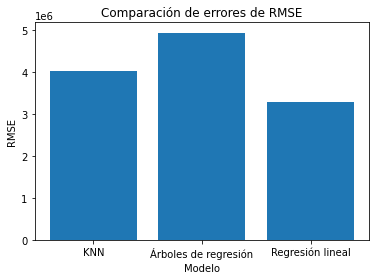

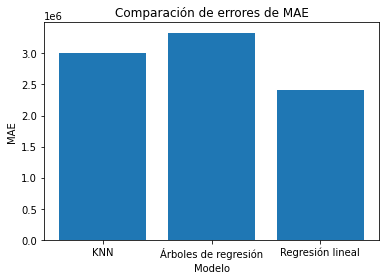

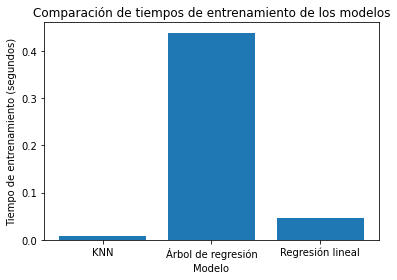

In [ ]:
# Graficar errores de RMSE
plt.bar(['KNN', 'Árboles de regresión', 'Regresión lineal'], [rmse_knn, rmse_tree, rmse_lr])
plt.title('Comparación de errores de RMSE')
plt.xlabel('Modelo')
plt.ylabel('RMSE')
plt.show()
print("\n")

# Graficar errores de MAE
plt.bar(['KNN', 'Árboles de regresión', 'Regresión lineal'], [mae_knn, mae_tree, mae_lr])
plt.title('Comparación de errores de MAE')
plt.xlabel('Modelo')
plt.ylabel('MAE')
plt.show()
print("\n")


# Para los tiempos de entrenaimiento
# Crear una lista con los tiempos de entrenamiento de los tres modelos
train_times = [train_time_knn, train_time_tree, train_time_lr]

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los tiempos de entrenamiento de los tres modelos
ax.bar(['KNN', 'Árbol de regresión', 'Regresión lineal'], train_times)

# Agregar etiquetas y título
ax.set_xlabel('Modelo')
ax.set_ylabel('Tiempo de entrenamiento (segundos)')
ax.set_title('Comparación de tiempos de entrenamiento de los modelos')

# Mostrar la figura
plt.show()



Como se puede observar el mejor es el de regresión lineal con los parámetros por defecto, es el que menos error tiene en ambas mediciones respecto a los otros dos. Esto puede deberse a que las variables de entrada pueden tener una relacion lineal con la de salida o porque los datos contienen ruido, lo que hace que a regresión lineal pueda producir una mejor predicción que KNN y árboles de regresión debido a su simplicidad. Los modelos más flexibles como KNN y árboles de regresión suelen ser más sensibles al ruido y producir una peor predicción. Sin embargo, no es el más rápido, ya que el KNN con los parametros por defecto es el mas rapido de los tres puede ser debido a que es un modelo no paramétrico y no requiere un proceso de entrenamiento intensivo.

## Ajuste de hiperparametros

Ajuste de hiperparametros en KNN

In [ ]:
# Crear modelo de KNN
knn = KNeighborsRegressor()

# Definir grid de parámetros
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

# Realizar búsqueda de hiperparámetros
knn_grid = GridSearchCV(knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Medir tiempo de entrenamiento
start_time = time.time()

knn_grid.fit(X_train, y_train)

# Calcular tiempo de entrenamiento
train_time_knn_op = time.time() - start_time

# Obtener los mejores parámetros
knn_best_params = knn_grid.best_params_

# Entrenar modelo con los mejores parámetros
knn = KNeighborsRegressor(**knn_best_params)
knn.fit(X_train, y_train)

# Evaluar modelo
rmse_knn_op = np.sqrt(-cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()
mae_knn_op = -cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()

print("KNN:\n", "Best parameters:", knn_best_params, "\n", "RMSE:", rmse_knn_op, "\n", "MAE:", mae_knn_op)
print('Tiempo de entrenamiento:', train_time_knn_op)

KNN:
 Best parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'} 
 RMSE: 3745133.874758045 
 MAE: 2744849.946772506
Tiempo de entrenamiento: 266.13586497306824


Ajuste de hiperparametros en un arbol de regresion

In [ ]:
# Crear modelo de Árbol de Regresión
tree = DecisionTreeRegressor(random_state=42)

# Definir grid de parámetros
param_grid = {
    'max_depth': [None, 1, 2, 3, 4, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Realizar búsqueda de hiperparámetros
tree_grid = GridSearchCV(tree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Medir tiempo de entrenamiento
start_time = time.time()

tree_grid.fit(X_train, y_train)

# Calcular tiempo de entrenamiento
train_time_tree_op = time.time() - start_time

# Obtener los mejores parámetros
tree_best_params = tree_grid.best_params_

# Entrenar modelo con los mejores parámetros
tree = DecisionTreeRegressor(**tree_best_params, random_state=42)
tree.fit(X_train, y_train)

# Evaluar modelo
rmse_tree_op = np.sqrt(-cross_val_score(tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error')).mean()
mae_tree_op = -cross_val_score(tree, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()

print("Árbol de Regresión:\n", "Best parameters:", tree_best_params, "\n", "RMSE:", rmse_tree_op, "\n", "MAE:", mae_tree_op)
print('Tiempo de entrenamiento:', train_time_tree_op)

Árbol de Regresión:
 Best parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10} 
 RMSE: 3805281.463098604 
 MAE: 2761836.3271472347
Tiempo de entrenamiento: 142.75231456756592


Ajuste de hiperparametros en regresion lineal

In [ ]:
# Define los hiperparámetros para ajustar
params = {'fit_intercept': [True, False],
          'normalize': [True, False],
          'copy_X': [True, False]}

# Define el modelo de regresión lineal
model = LinearRegression()

# Realiza la búsqueda de cuadrícula
grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_error', refit=True)
grid.fit(X_train, y_train)

# Obtiene los valores óptimos de los hiperparámetros
best_params = grid.best_params_

# Crea un nuevo modelo de regresión lineal utilizando los valores óptimos de los hiperparámetros
model_best = LinearRegression(**best_params)

# Medir tiempo de entrenamiento
start_time = time.time()

# Ajusta el modelo utilizando todo el conjunto de entrenamiento
model_best.fit(X_train, y_train)

# Calcular tiempo de entrenamiento
train_time_lr_op = time.time() - start_time

# Realiza predicciones sobre el conjunto de prueba utilizando el modelo ajustado con los valores óptimos de los hiperparámetros
y_pred = model_best.predict(X_test)

# Calcula el MAE y RMSE del modelo ajustado con los valores óptimos de los hiperparámetros
mae_lr_op = mean_absolute_error(y_test, y_pred)
rmse_lr_op = np.sqrt(mean_squared_error(y_test, y_pred))

print("######################################################################")
print("######################################################################")
print("######################################################################")
print("Best parameters:", best_params)
print("MAE:", mae_lr_op)
print("RMSE:", rmse_lr_op)
print('Tiempo de entrenamiento:', train_time_lr_op)
print("######################################################################")
print("######################################################################")
print("######################################################################")


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

######################################################################
######################################################################
######################################################################
Best parameters: {'copy_X': True, 'fit_intercept': False, 'normalize': True}
MAE: 2418957.4816377056
RMSE: 3294336.357212385
Tiempo de entrenamiento: 0.035695791244506836
######################################################################
######################################################################
######################################################################


A continuacion se muestra la misma grafica pero con los valores optimizados

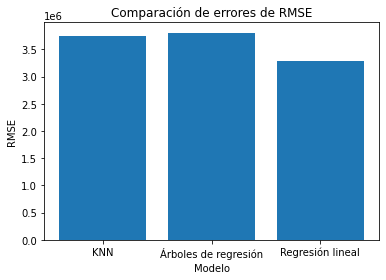

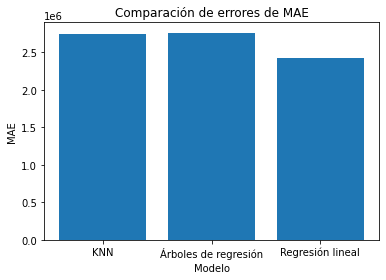

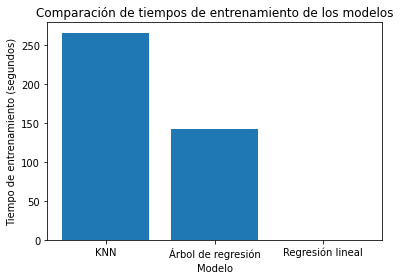

In [ ]:
# Graficar errores de RMSE
plt.bar(['KNN', 'Árboles de regresión', 'Regresión lineal'], [rmse_knn_op, rmse_tree_op, rmse_lr_op])
plt.title('Comparación de errores de RMSE')
plt.xlabel('Modelo')
plt.ylabel('RMSE')
plt.show()
print("\n")

# Graficar errores de MAE
plt.bar(['KNN', 'Árboles de regresión', 'Regresión lineal'], [mae_knn_op, mae_tree_op, mae_lr_op])
plt.title('Comparación de errores de MAE')
plt.xlabel('Modelo')
plt.ylabel('MAE')
plt.show()
print("\n")



# Para los tiempos de entrenaimiento
# Crear una lista con los tiempos de entrenamiento de los tres modelos
train_times = [train_time_knn_op, train_time_tree_op, train_time_lr_op]

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los tiempos de entrenamiento de los tres modelos
ax.bar(['KNN', 'Árbol de regresión', 'Regresión lineal'], train_times)

# Agregar etiquetas y título
ax.set_xlabel('Modelo')
ax.set_ylabel('Tiempo de entrenamiento (segundos)')
ax.set_title('Comparación de tiempos de entrenamiento de los modelos')

# Mostrar la figura
plt.show()



## Comparacion respecto valores por defecto

Como se observa en las mediciones de los errores en las tres celdas, KNN y arboles de regresion han mejorado respecto a usar los valores por defecto. Esto se debe a que el modelo ha encontrado unos mejores valores de los hiperparametros, los cuales mostramos sus valores al imprimirlos. En el caso de la regresion lineal, no mejora, esto creemos que se debe a que los valores por defecto ya son los optimos de los hiperparametros y estos tambien los mostramos por pantalla.

# CONCLUSION